In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ubah akses menjadi privat
! chmod 600 /content/kaggle.json

In [ ]:
#import dataset ke dalam file content
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 99% 328M/330M [00:12<00:00, 41.1MB/s]
100% 330M/330M [00:12<00:00, 26.9MB/s]


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/face-mask-12k-images-dataset.zip', 'r')
zip_file.extractall('/tmp')

In [ ]:
#import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(
    brightness_range=[0.3, 0.9],
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    rescale=1./255,
    validation_split=0.5, #50/50
)

test_datagenerator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.5
)

In [ ]:
#Bagi data menjadi 2, satu untuk generator dan satu untuk di tes
train_generator = train_datagenerator.flow_from_directory(
        '/tmp/Face Mask Dataset/Train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary', #menggunkan binary karena dibagi ke dalam 2 kategori, satu untuk kendaraan dan satu bukan kendaraan
        subset = 'training'
        )

validation_generator = test_datagenerator.flow_from_directory(
        '/tmp/Face Mask Dataset/Validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary', #menggunkan binary karena dibagi ke dalam 2 kategori, satu untuk kendaraan dan satu bukan kendaraan
        subset = 'validation'
        )

Found 5000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
#Buat model menggunakan library tensorflow
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #Convolution Layer
    tf.keras.layers.MaxPooling2D(2, 2), #Pooling Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1), #Dropout layer untuk mencegah overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), #Dense Layer w/ relu activation
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') ##
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(
    optimizer =  'adam',
    loss = 'binary_crossentropy', #gunakan binary karena untuk mendeteksi apakah gambar tersebut kendaraan atau bukan
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs = 10,
    steps_per_epoch = 15,
    validation_data = validation_generator,
    verbose = 2,
)

Epoch 1/10
15/15 - 2s - loss: 0.0559 - accuracy: 0.9750 - val_loss: 0.1896 - val_accuracy: 0.9650 - 2s/epoch - 127ms/step
Epoch 2/10
15/15 - 2s - loss: 0.0916 - accuracy: 0.9750 - val_loss: 0.0704 - val_accuracy: 0.9700 - 2s/epoch - 126ms/step
Epoch 3/10
15/15 - 2s - loss: 0.0470 - accuracy: 0.9875 - val_loss: 0.0694 - val_accuracy: 0.9800 - 2s/epoch - 127ms/step
Epoch 4/10
15/15 - 2s - loss: 0.1082 - accuracy: 0.9708 - val_loss: 0.0658 - val_accuracy: 0.9875 - 2s/epoch - 124ms/step
Epoch 5/10
15/15 - 2s - loss: 0.0515 - accuracy: 0.9825 - val_loss: 0.0479 - val_accuracy: 0.9875 - 2s/epoch - 122ms/step
Epoch 6/10
15/15 - 2s - loss: 0.0668 - accuracy: 0.9750 - val_loss: 0.2492 - val_accuracy: 0.8875 - 2s/epoch - 128ms/step
Epoch 7/10
15/15 - 2s - loss: 0.1015 - accuracy: 0.9688 - val_loss: 0.0958 - val_accuracy: 0.9600 - 2s/epoch - 124ms/step
Epoch 8/10
15/15 - 2s - loss: 0.0878 - accuracy: 0.9792 - val_loss: 0.0812 - val_accuracy: 0.9650 - 2s/epoch - 125ms/step
Epoch 9/10
15/15 - 2s - 

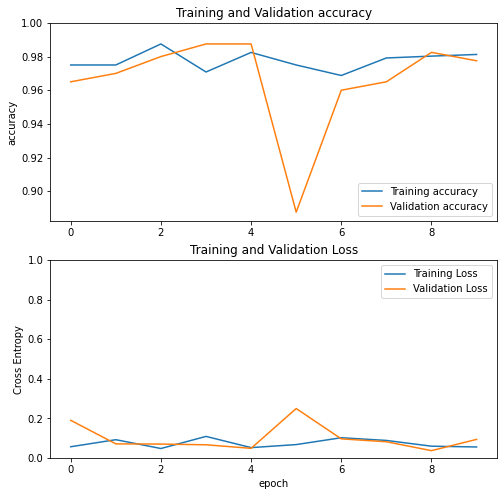

In [ ]:
import matplotlib.pyplot as plt

#Menampilkan Graph progresi model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
     

1/1 [==============================] - 0s 16ms/step
e98fab3e03a1eb9e40a13a964b49c721.jpg
tidak memakai masker


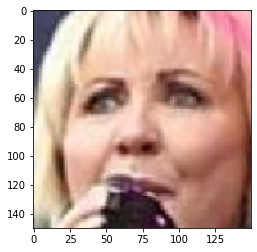

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/tmp/Face Mask Dataset/Test/WithoutMask/1000.png',target_size=(150,150))
# test_image_view = test_image


imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
     
classes = model.predict(images, batch_size=10)  
print(fn)
if classes==0:
  print('memakai masker')
else:
  print('tidak memakai masker')

1/1 [==============================] - 0s 18ms/step
e98fab3e03a1eb9e40a13a964b49c721.jpg
memakai masker


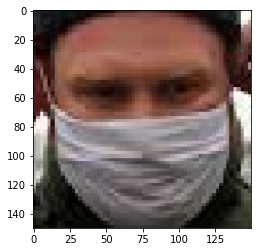

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/tmp/Face Mask Dataset/Test/WithMask/152.png',target_size=(150,150))
# test_image_view = test_image


imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
     
classes = model.predict(images, batch_size=10)  
print(fn)
if classes==0:
  print('memakai masker')
else:
  print('tidak memakai masker')

Saving maksssksksss10.png to maksssksksss10.png
1/1 [==============================] - 0s 19ms/step
maksssksksss10.png
memakai masker


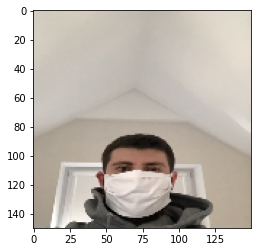

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
     
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
     
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
     
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
    print('memakai masker')
  else:
    print('tidak memakai masker')